<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Product_Recommendation_System_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

**Item to item based recommendation system based on product description**

In [7]:
product_descriptions = pd.read_csv('/content/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [8]:
# Checking Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [9]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Feature extraction from product descriptions
Converting the text in product description into numerical data for analysis

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

**Visualizing product clusters in subset of data**

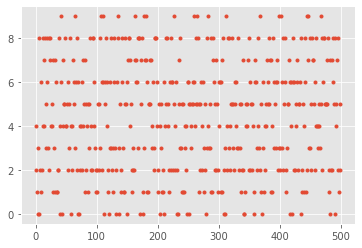

In [11]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [13]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

**Top words in each cluster based on product description**

**Recommendation of product based on the current product selected by user.**

**To recommend related product based on, Frequently bought together.**

In [14]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 ft
 window
 easy
 vary
 size
 screen
 rug
 aluminum
 product
 outdoor
Cluster 1:
 flush
 toilet
 design
 bowl
 piece
 features
 water
 clean
 offers
 efficiency
Cluster 2:
 commercial
 cycle
 duty
 steel
 lbs
 high
 dry
 easy
 heavy
 use
Cluster 3:
 air
 power
 cooling
 fan
 ft
 unit
 control
 light
 plan
 protection
Cluster 4:
 tool
 metal
 drill
 saw
 work
 storage
 wall
 easy
 gauge
 power
Cluster 5:
 door
 cooking
 oven
 easy
 installation
 drawer
 design
 opening
 provides
 helps
Cluster 6:
 outdoor
 patio
 fabric
 color
 frame
 wood
 dining
 cushions
 wicker
 steel
Cluster 7:
 tape
 insulation
 water
 heater
 easy
 fiberglass
 use
 vinyl
 gas
 brush
Cluster 8:
 paint
 trim
 roller
 wall
 set
 azek
 ft
 screws
 screw
 project
Cluster 9:
 water
 roof
 ice
 seal
 metal
 roofing
 use
 deck
 designed
 snow


**Predicting clusters based on key search words**

In [16]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

**Keyword : cutting tool**

In [17]:
show_recommendations("cutting tool")

Cluster 4:
 tool
 metal
 drill
 saw
 work
 storage
 wall
 easy
 gauge
 power


**Keyword : spray paint**

In [18]:
show_recommendations("spray paint")

Cluster 8:
 paint
 trim
 roller
 wall
 set
 azek
 ft
 screws
 screw
 project


In [19]:
show_recommendations("water")

Cluster 9:
 water
 roof
 ice
 seal
 metal
 roofing
 use
 deck
 designed
 snow
